In [1]:
#Here we'll take a look at basic data manipulation and visualization tools in python

import numpy as np    #import numpy for vectorized functions
import matplotlib.pyplot as plt    #import to visualize and plot
from matplotlib import animation    #import to animate a visualization
from matplotlib.sankey import Sankey    #for fun flowcharts
import csv    #import to read in data the easy way
import scipy.stats    #import for stats functions


In [ ]:
#how do we import data?

#1) The hard way:
def importer(path):
    """This function will import the data that resides at <path>.
    It will place it into a python dictionary and return said dictionary."""
    d = {}    #an empty dictionary
    with open(path) as f:    #open the link to the data
        Data = f.readlines()    #read in the data
    vars = Data[0].split(',')    #split the data on commas
    for i in range(len(vars)):    #loop over the variables
        data_i = []    #create a list to hold the data
        for j in range(1,len(Data)):    #loop over the data
            data_ji = Data[j].split(',')    #split the line on commas
            try:
                data_i.append(float(data_ji[i]))    #append the data as a float
            except:
                data_i.append(data_ji[i])    #unless you can't, in which case simply append
            d[vars[i]] = data_i    #add the variable to the dictionary
    return d

path = '/Users/seniordatascientist/Desktop/Metis Codes/Data/titanic3.csv'    #specify the path
data = importer(path)    #call the importer function

In [ ]:
#2) One of the easier ways:
d = {}    #an empty dictionary
with open(path) as f:    #open the link to the data
    Data = csv.reader(f)    #read in the data
    for j in Data:    #loop over the observations
        d[j[2]] = j    #and add the data to the dictionary


In [2]:
#3) Measures of central tendency:

d_1 = np.random.normal(loc = 2, scale = 1, size = 1000)    #generate some random data
d_2 = np.random.normal(loc = 1, scale = 2, size = 1000)    #generate some random data
d_3 = np.random.normal(loc = 5, scale = 1, size = 1000)    #generate some random data



In [3]:
print('Variable:','d_1    ','d_2    ','d_3')
print('max:    ',' {0:.4f}  {1:.4f} {2:.4f}'.format(max(d_1), max(d_2), max(d_3)))
print('80%:    ',' {0:.4f}  {1:.4f} {2:.4f}'.format(np.percentile(d_1,q=80), np.percentile(d_2,80), np.percentile(d_3,80)))
print('60%:    ',' {0:.4f}  {1:.4f} {2:.4f}'.format(np.percentile(d_1,q=60), np.percentile(d_2,60), np.percentile(d_3,60)))
print('mean:   ',' {0:.4f}  {1:.4f} {2:.4f}'.format(np.mean(d_1), np.mean(d_2), np.mean(d_3)))
print('median: ',' {0:.4f}  {1:.4f} {2:.4f}'.format(np.median(d_1), np.median(d_2), np.median(d_3)))
print('40%:    ',' {0:.4f}  {1:.4f} {2:.4f}'.format(np.percentile(d_1,q=40), np.percentile(d_2,40), np.percentile(d_3,40)))
print('20%:    ',' {0:.4f} {1:.4f} {2:.4f}'.format(np.percentile(d_1,q=20), np.percentile(d_2,20), np.percentile(d_3,20)))
print('min:    ','{0:.4f} {1:.4f} {2:.4f}'.format(min(d_1), min(d_2), min(d_3)))

Variable: d_1     d_2     d_3
max:      5.3275  9.8508 7.9908
80%:      2.8017  2.6316 5.8351
60%:      2.1801  1.4412 5.2493
mean:     1.9747  0.9527 5.0269
median:   1.9491  0.9503 5.0438
40%:      1.7055  0.4458 4.8234
20%:      1.1420 -0.7158 4.1834
min:     -1.5942 -5.5696 1.9683


In [6]:
#And of course with numpy these can be vectorized as well!

print(np.mean([d_1,d_2,d_3],axis=1))    #vectorized means
print(np.median([d_1,d_2,d_3],axis=1))    #vectorized medians
print(np.percentile([d_1,d_2,d_3],95,axis=1))    #vectorized percentiles

[ 1.97465886  0.95265795  5.02686083]
[ 1.9490964   0.95031505  5.0437974 ]
[ 3.660997    4.09840611  6.71775368]


In [7]:
#4) Measures of spread:

print('Variable: ',' d_1    ','d_2   ','d_3')
print('stdev:    ',' {0:.4f}  {1:.4f} {2:.4f}'.format(np.std(d_1), np.std(d_2), np.std(d_3)))
print('variance: ',' {0:.4f}  {1:.4f} {2:.4f}'.format(np.std(d_1)**2.0, np.std(d_2)**2.0, np.std(d_3)**2.0))

Variable:   d_1     d_2    d_3
stdev:      0.9745  1.9873 1.0027
variance:   0.9496  3.9494 1.0055


In [8]:
#As above, these np functions are vectorized.

print(np.std([d_1,d_2,d_3],axis=1))    #vectorized standard deviations
print(np.std([d_1,d_2,d_3],axis=1)**2.0)    #vectorized variance

[ 0.97446981  1.98730195  1.00274367]
[ 0.94959142  3.94936905  1.00549486]


In [9]:
#5) Measures of distributional shape:

def skew(d):
    """Takes in an array d.  Returns the estimate of the skew of d."""
    return (1/len(d)*sum((d - np.mean(d))**3.0))/((1/(len(d) - 1.0)*sum((d - np.mean(d))**2.0))**(3.0/2.0))

def kurtosis(d):
    """Takes in an array d.  Returns the estimate of the kurtosis of d."""
    return (1/len(d))*sum((d - np.mean(d))**4.0)/(((1/len(d))*sum((d - np.mean(d))**2.0))**2.0) - 3.0

print('Variable:     ',' d_1    ','d_2   ','d_3')
print('skew:         ',' {0:.4f}  {1:.4f} {2:.4f}'.format(skew(d_1), skew(d_2), skew(d_3)))
print('skew (scipy): ',' {0:.4f}  {1:.4f} {2:.4f}'.format(scipy.stats.skew(d_1), scipy.stats.skew(d_2), scipy.stats.skew(d_3)))
print('kurtosis:     ',' {0:.4f}  {1:.4f} {2:.4f}'.format(kurtosis(d_1), kurtosis(d_2), kurtosis(d_3)))

Variable:       d_1     d_2    d_3
skew:           0.0964  0.1078 0.0021
skew (scipy):   0.0966  0.1079 0.0021
kurtosis:       -0.0640  0.3193 0.0375


In [10]:
#6) Dependency:
print(np.corrcoef([d_1,d_2,d_3]))    #the correlation matrix




[[ 1.         -0.00468724  0.06324997]
 [-0.00468724  1.         -0.05139313]
 [ 0.06324997 -0.05139313  1.        ]]


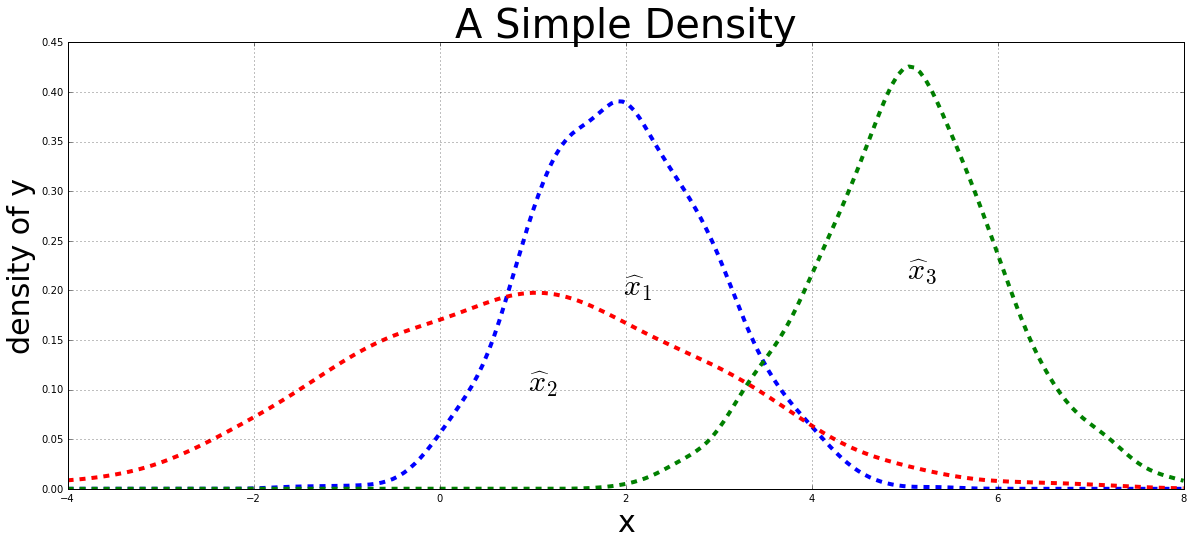

In [11]:
#7) Basic visualization -- a density
%matplotlib inline

xs = np.linspace(-4,8,200)    #set the x range

#compute the density for the first data
density_1 = scipy.stats.gaussian_kde(d_1)    #use the scipy density calculator
density_1.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
density_1._compute_covariance()    #recompute using the new covariance factor

#and then for the second data
density_2 = scipy.stats.gaussian_kde(d_2)    #use the scipy density calculator
density_2.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
density_2._compute_covariance()    #recompute using the new covariance factor

#and then for the third data
density_3 = scipy.stats.gaussian_kde(d_3)    #use the scipy density calculator
density_3.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
density_3._compute_covariance()    #recompute using the new covariance factor

plt.figure(figsize = (20,8))    #initiate the plot
plt.plot(xs,density_1(xs),'b--',xs,density_2(xs),'r--',xs,density_3(xs),'g--',lw=4)    #generate the plot
plt.xlabel('x',fontsize=30)    #add an x label
plt.ylabel('density of y',fontsize=30)    #add a y label
plt.text(np.mean(d_1),max(density_1(xs))/2.0,r'$\widehat{x}_1$',fontsize=30)    #add LaTeX text for location of the mean
plt.text(np.mean(d_2),max(density_2(xs))/2.0,r'$\widehat{x}_2$',fontsize=30)    #add LaTeX text for location of the mean
plt.text(np.mean(d_3),max(density_3(xs))/2.0,r'$\widehat{x}_3$',fontsize=30)    #add LaTeX text for location of the mean
plt.title('A Simple Density',fontsize=40)    #add a title to the plot
plt.grid(True)
plt.savefig('/Users/seniordatascientist/Desktop/Metis Codes/Density.pdf')    #save the plot to file
plt.show()    #and then show the plot

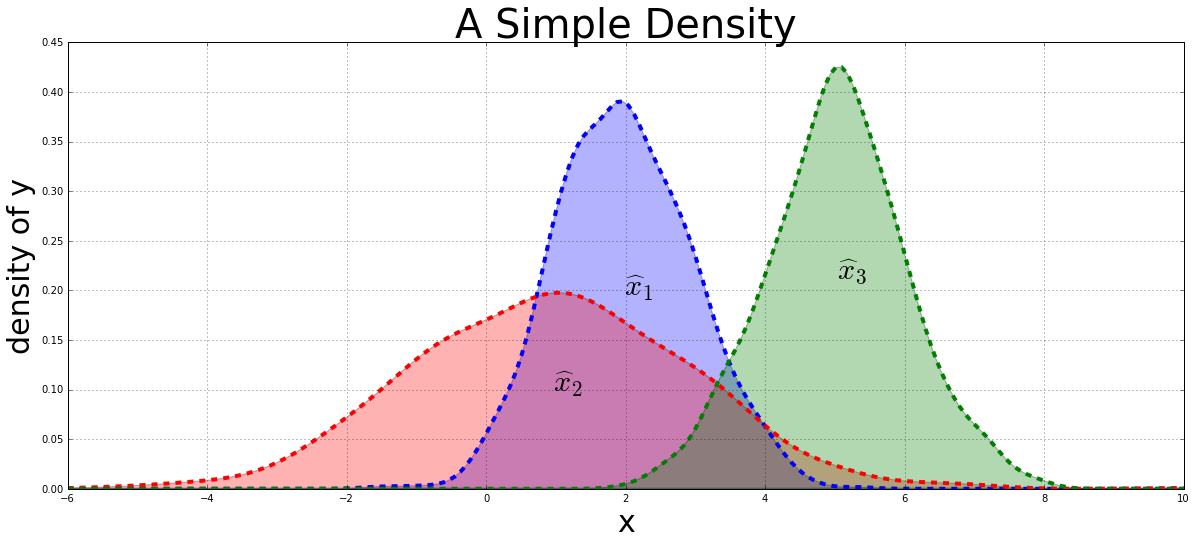

In [12]:
#7) Basic visualization -- a density
%matplotlib inline

xs = np.linspace(-6,10,200)    #set the x range

#compute the density for the first data
density_1 = scipy.stats.gaussian_kde(d_1)    #use the scipy density calculator
density_1.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
density_1._compute_covariance()    #recompute using the new covariance factor

#and then for the second data
density_2 = scipy.stats.gaussian_kde(d_2)    #use the scipy density calculator
density_2.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
density_2._compute_covariance()    #recompute using the new covariance factor

#and then for the third data
density_3 = scipy.stats.gaussian_kde(d_3)    #use the scipy density calculator
density_3.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
density_3._compute_covariance()    #recompute using the new covariance factor

plt.figure(figsize = (20,8))    #initiate the plot
plt.plot(xs,density_1(xs),'b--',xs,density_2(xs),'r--',xs,density_3(xs),'g--',lw=4)    #generate the plot
plt.fill(xs,density_1(xs),'b',alpha=0.3)    #fill in the curves
plt.fill(xs,density_2(xs),'r',alpha=0.3)    #fill in the curves
plt.fill(xs,density_3(xs),'g',alpha=0.3)    #fill in the curves
plt.xlabel('x',fontsize=30)    #add an x label
plt.ylabel('density of y',fontsize=30)    #add a y label
plt.text(np.mean(d_1),max(density_1(xs))/2.0,r'$\widehat{x}_1$',fontsize=30)    #add LaTeX text for location of the mean
plt.text(np.mean(d_2),max(density_2(xs))/2.0,r'$\widehat{x}_2$',fontsize=30)    #add LaTeX text for location of the mean
plt.text(np.mean(d_3),max(density_3(xs))/2.0,r'$\widehat{x}_3$',fontsize=30)    #add LaTeX text for location of the mean
plt.title('A Simple Density',fontsize=40)    #add a title to the plot
plt.grid(True)    #add a grid
plt.savefig('/Users/seniordatascientist/Desktop/Metis Codes/Density.pdf')    #save the plot to file
plt.show()    #and then show the plot

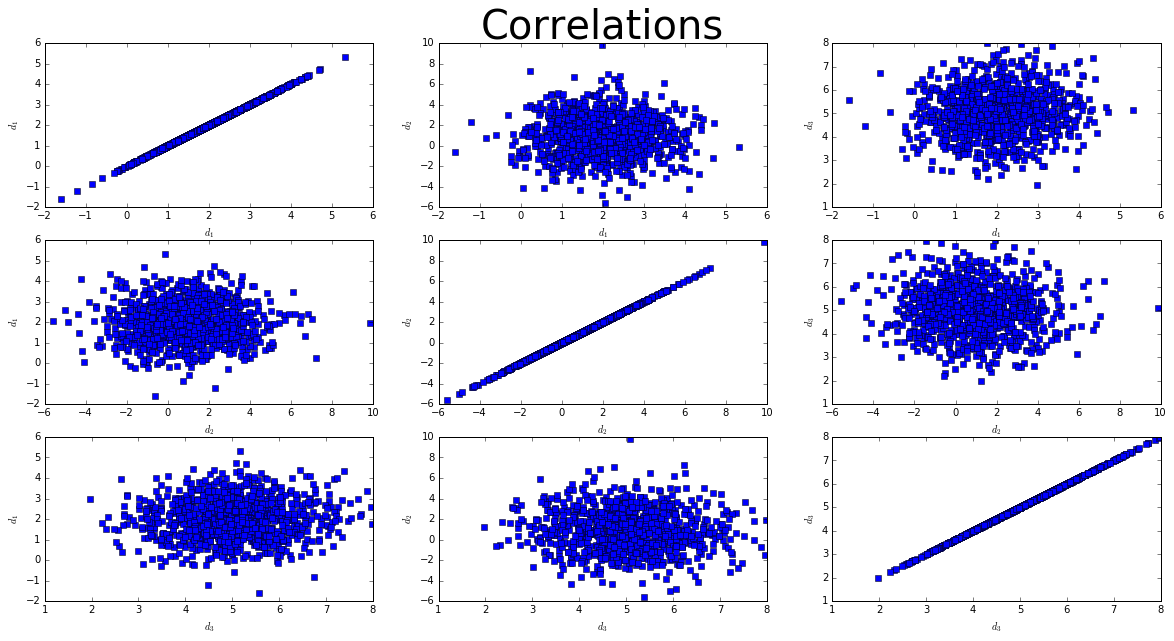

In [13]:
#A scatterplot with multiple figures contained in one plot

%matplotlib inline

plt.figure(figsize = (20,10))    #initiate the plot

plt.subplot(3,3,1)    #plot subplot 1,1 in the 3x3 area
plt.plot(d_1,d_1,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_1$',fontsize=10)    #add an x label
plt.ylabel(r'$d_1$',fontsize=10)    #add a y label

plt.subplot(3,3,2)    #plot subplot 1,2 in the 3x3 area
plt.plot(d_1,d_2,'bs',lw=4)    #generate the plot
plt.title('Correlations',fontsize=40)    #add a title to the plot
plt.xlabel(r'$d_1$',fontsize=10)    #add an x label
plt.ylabel(r'$d_2$',fontsize=10)    #add a y label

plt.subplot(3,3,3)    #plot subplot 1,3 in the 3x3 area
plt.plot(d_1,d_3,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_1$',fontsize=10)    #add an x label
plt.ylabel(r'$d_3$',fontsize=10)    #add a y label

plt.subplot(3,3,4)    #plot subplot 2,1 in the 3x3 area
plt.plot(d_2,d_1,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_2$',fontsize=10)    #add an x label
plt.ylabel(r'$d_1$',fontsize=10)    #add a y label

plt.subplot(3,3,5)    #plot subplot 2,2 in the 3x3 area
plt.plot(d_2,d_2,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_2$',fontsize=10)    #add an x label
plt.ylabel(r'$d_2$',fontsize=10)    #add a y label

plt.subplot(3,3,6)    #plot subplot 2,3 in the 3x3 area
plt.plot(d_2,d_3,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_2$',fontsize=10)    #add an x label
plt.ylabel(r'$d_3$',fontsize=10)    #add a y label

plt.subplot(3,3,7)    #plot subplot 3,1 in the 3x3 area
plt.plot(d_3,d_1,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_3$',fontsize=10)    #add an x label
plt.ylabel(r'$d_1$',fontsize=10)    #add a y label

plt.subplot(3,3,8)    #plot subplot 3,2 in the 3x3 area
plt.plot(d_3,d_2,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_3$',fontsize=10)    #add an x label
plt.ylabel(r'$d_2$',fontsize=10)    #add a y label

plt.subplot(3,3,9)    #plot subplot 3,3 in the 3x3 area
plt.plot(d_3,d_3,'bs',lw=4)    #generate the plot
plt.xlabel(r'$d_3$',fontsize=10)    #add an x label
plt.ylabel(r'$d_3$',fontsize=10)    #add a y label

plt.savefig('/Users/seniordatascientist/Desktop/Metis Codes/Scatter_plot.pdf')    #save the plot to file
plt.show()    #and then show the plot



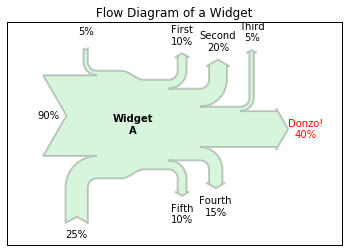

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=120,
                format='%.0f', unit='%')
sankey.add(flows=[25, 5, 90, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Donzo!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.5, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA",
           alpha=0.2, lw=2.0)  # Arguments to matplotlib.patches.PathPatch()
diagrams = sankey.finish()
diagrams[0].patch.set_facecolor('#37c959')
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')
# Notice:
#   1. Since the sum of the flows is nonzero, the width of the trunk isn't
#      uniform.  If verbose.level is helpful (in matplotlibrc), a message is
#      given in the terminal window.
#   2. The second flow doesn't appear because its value is zero.  Again, if
#      verbose.level is helpful, a message is given in the terminal window.


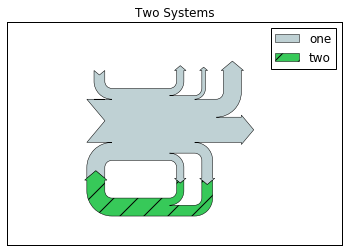

In [18]:
# Example 3
# This demonstrates:
#   1. Connecting two systems
#   2. Turning off the labels of the quantities
#   3. Adding a legend
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], fc='#37c959', label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend(loc='best')
plt.savefig('/Users/seniordatascientist/Desktop/Metis Codes/Flow.pdf')    #save the plot to file
# Notice that only one connection is specified, but the systems form a
# circuit since: (1) the lengths of the paths are justified and (2) the
# orientation and ordering of the flows is mirrored.

plt.show()